## Rate Trend Based on Major Categories Analysis

This notebook will be focusing on the exploration on the employment rate and wage rate trend based on each major category to see which major categories would have the higher salary and stabler employment rate from 2010 to 2018. We will investigate the trends of each variables by line plots.

In [11]:
# importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collegetools.rateplot import combine2table, employment_rate_table, plotting_trend, filter_major_category
year_lst = ["2010", "2012", "2014", "2016", "2018"]
filetype = 'png'

In [12]:
# read in the required data
edu_wage10 = pd.read_csv("data/pums/processed/10_edu_wage_data.csv")
edu_wage12 = pd.read_csv("data/pums/processed/12_edu_wage_data.csv")
edu_wage14 = pd.read_csv("data/pums/processed/14_edu_wage_data.csv")
edu_wage16 = pd.read_csv("data/pums/processed/16_edu_wage_data.csv")
edu_wage18 = pd.read_csv("data/pums/processed/18_edu_wage_data.csv")
edu_wage10.head()

,ADJINC,PWGTP,AGEP,CIT,COW,ENG,SCHL,SEX,WAGP,WKHP,WKW,ESR,FOD1P,FOD2P,PERNP
0,1007624,97,25,1,4.0,NaN,22.0,1,17000.0,20.0,1.0,1.0,5007.0,NaN,17000.0
1,1007624,82,33,1,1.0,NaN,21.0,1,28000.0,40.0,1.0,1.0,6206.0,NaN,28000.0
2,1007624,16,63,1,NaN,NaN,22.0,1,0.0,NaN,NaN,6.0,3700.0,5007.0,0.0
3,1007624,14,59,1,NaN,NaN,22.0,2,0.0,NaN,NaN,6.0,2399.0,2303.0,0.0
4,1007624,67,78,1,NaN,NaN,21.0,2,0.0,NaN,NaN,6.0,6107.0,NaN,0.0


In [13]:
majors_list = pd.read_csv("data/fivethiryeight/majors-list.csv")
majors_list = majors_list[majors_list["FOD1P"] != "bbbb "]
majors_list["FOD1P"] = pd.to_numeric(majors_list["FOD1P"])
majors_list.head()

,FOD1P,Major,Major_Category
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources
4,1104,FOOD SCIENCE,Agriculture & Natural Resources


In [14]:
# combine all the data
new_edu_wage10 = combine2table(edu_wage10, majors_list)
new_edu_wage12 = combine2table(edu_wage12, majors_list)
new_edu_wage14 = combine2table(edu_wage14, majors_list)
new_edu_wage16 = combine2table(edu_wage16, majors_list)
new_edu_wage18 = combine2table(edu_wage18, majors_list)

#### Which major categories have a stable demand of jobs over time? 

In [15]:
# store the first year data
employment_rate_df = employment_rate_table(new_edu_wage10, 2010)

# dictionary to save the data from 2012 to 2018
wage_data_dict = {12: new_edu_wage12, 14: new_edu_wage14, \
                  16: new_edu_wage16, 18: new_edu_wage18}

# merge other years data on the first year data
for key in wage_data_dict:
    new_employment_df = employment_rate_table(wage_data_dict[key], 2000+key)
    employment_rate_df = employment_rate_df.merge(new_employment_df, on = "Major_Category", how = "left")

# calculate the standard deviation value for each major category and 
# filtered out the major category with a sd that is greater than 1.5
employment_sd = employment_rate_df.std(axis = 1).values
employment_rate_df["sd"] = employment_sd

# filter out the sd that are greater than 1.5
employment_rate_df = employment_rate_df[employment_rate_df["sd"] <= 1.5]
employment_rate_df = employment_rate_df.drop("sd", axis = 1)

# transpose the dataframe, easy for plotting
employment_rate_df = employment_rate_df.set_index("Major_Category")
employment_rate_df = employment_rate_df.T
employment_rate_df = employment_rate_df.reset_index()
employment_rate_df = employment_rate_df.drop("index", axis = 1)
employment_rate_df.head()

/home/jovyan/homework/hw7/hw07-Group21/collegetools/rateplot.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employment_df["index"] = table_copy.index
/tmp/ipykernel_1130/2819869246.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  employment_sd = employment_rate_df.std(axis = 1).values


Major_Category,Biology & Life Science,Business,Computers & Mathematics,Education,Engineering,Health,Humanities & Liberal Arts,Physical Sciences,Social Science
0,87.153285,90.271226,89.638932,92.540323,90.336134,87.867647,88.072122,87.810384,87.816307
1,87.136929,89.277523,88.727858,92.506460,91.549296,91.449814,88.503401,87.616822,88.547486
2,89.120715,88.256441,91.743119,90.450928,93.349456,90.725806,87.914517,85.989011,89.548023
3,88.154613,89.851076,90.942928,91.666667,91.420118,90.353698,87.981711,89.195980,87.190083
4,89.912281,89.267849,90.605428,90.799031,93.387681,90.909091,88.801927,87.968442,88.619855


In [16]:
# save the dataframe to save memory in Binder
# employment_rate_df.to_csv("data/pums/processed/employment_rate_processed.csv", index=False)

In [17]:
employment_rate_df = pd.read_csv("data/pums/processed/employment_rate_processed.csv")
employment_rate_df.head()

,Biology & Life Science,Business,Computers & Mathematics,Education,Engineering,Health,Humanities & Liberal Arts,Physical Sciences,Social Science
0,87.153285,90.271226,89.638932,92.540323,90.336134,87.867647,88.072122,87.810384,87.816307
1,87.136929,89.277523,88.727858,92.506460,91.549296,91.449814,88.503401,87.616822,88.547486
2,89.120715,88.256441,91.743119,90.450928,93.349456,90.725806,87.914517,85.989011,89.548023
3,88.154613,89.851076,90.942928,91.666667,91.420118,90.353698,87.981711,89.195980,87.190083
4,89.912281,89.267849,90.605428,90.799031,93.387681,90.909091,88.801927,87.968442,88.619855


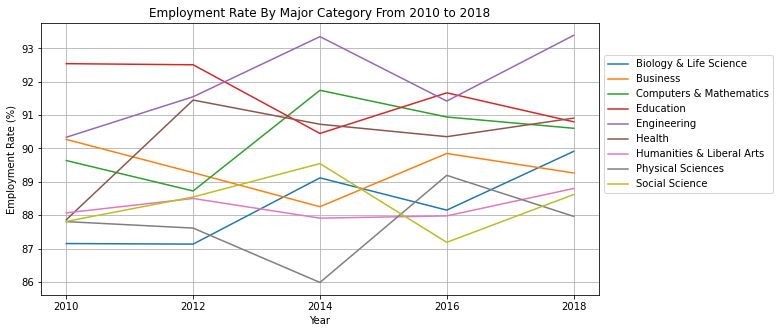

In [18]:
# plotting the employment rate trend
plotting_trend(employment_rate_df, "Employment Rate By Major Category From 2010 to 2018",\
               "Year", "Employment Rate (%)", year_lst, "employment_rate", filetype)

_By looking at the line plot above, we would only keep the major categories that have an increasing trend. They are Engineer, Biology & Life Science, Computers & Mathematics, and Health. The remaing major categories that have a stable trend are Humanities & Liberal Arts and Social Science. Therefore, major categories in Engineer, Biology & Life Science, Computers & Mathematics, Health, Humanities & Liberal Arts and Social Science trend to have a stable demand of jobs over time._

#### For those major categories with an grow trend, do they trend to have a higher salary?

In [19]:
# store the first year data
avg_wage_per_hr = filter_major_category(new_edu_wage10, 2010, employment_rate_df)

# merge other years data on the first year data
for key in wage_data_dict:
    new_avg_per_hr = filter_major_category(wage_data_dict[key], 2000+key, employment_rate_df)
    avg_wage_per_hr = avg_wage_per_hr.merge(new_avg_per_hr, on = "Major_Category")

# transpose the dataframe, easy for plotting
avg_wage_per_hr = avg_wage_per_hr.set_index("Major_Category")
avg_wage_per_hr = avg_wage_per_hr.T
avg_wage_per_hr = avg_wage_per_hr.reset_index()
avg_wage_per_hr = avg_wage_per_hr.drop("index", axis = 1)
avg_wage_per_hr.head()

Major_Category,Biology & Life Science,Business,Computers & Mathematics,Education,Engineering,Health,Humanities & Liberal Arts,Physical Sciences,Social Science
0,35.365788,31.515714,38.470533,25.295402,41.407122,33.198900,26.721050,38.326263,31.284657
1,36.535036,32.580151,39.999740,24.989683,42.479781,32.839742,28.840995,40.861140,34.793060
2,41.709938,35.310154,43.205380,25.869538,44.255455,34.670630,28.757138,46.166471,33.622338
3,41.874489,37.292932,48.967641,25.483899,49.698466,35.889916,31.172684,50.832243,36.449952
4,46.205376,39.570840,53.636024,29.608283,54.137553,36.498900,32.966783,47.261912,39.498475


In [9]:
# save the dataframe to save memory in Binder
# avg_wage_per_hr.to_csv("data/pums/processed/wage_rate_processed.csv", index=False)

In [20]:
avg_wage_per_hr = pd.read_csv("data/pums/processed/wage_rate_processed.csv")
avg_wage_per_hr.head()

,Biology & Life Science,Business,Computers & Mathematics,Education,Engineering,Health,Humanities & Liberal Arts,Physical Sciences,Social Science
0,35.365788,31.515714,38.470533,25.295402,41.407122,33.198900,26.721050,38.326263,31.284657
1,36.535036,32.580151,39.999740,24.989683,42.479781,32.839742,28.840995,40.861140,34.793060
2,41.709938,35.310154,43.205380,25.869538,44.255455,34.670630,28.757138,46.166471,33.622338
3,41.874489,37.292932,48.967641,25.483899,49.698466,35.889916,31.172684,50.832243,36.449952
4,46.205376,39.570840,53.636024,29.608283,54.137553,36.498900,32.966783,47.261912,39.498475


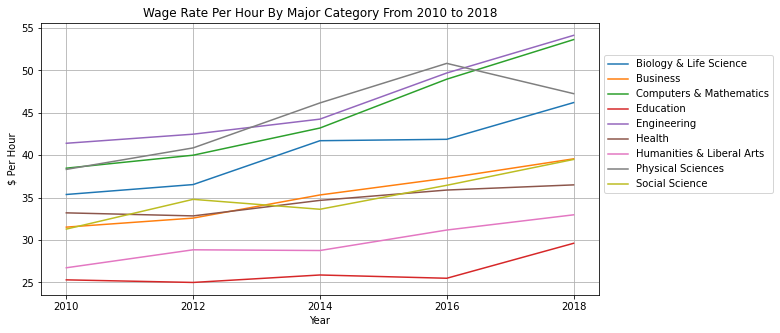

In [21]:
# plotting the rate rate trend
plotting_trend(avg_wage_per_hr, "Wage Rate Per Hour By Major Category From 2010 to 2018",\
               "Year", "$ Per Hour", year_lst, "wage_rate", filetype)

_From the above plot, we observed that all the major categories have a increasing trend over eight years. The major categories with a steady employment rate trend to have a higher salary increase than others except for the Health major category. However, this might due to bias that we treated everyone to have the same amount of work hours. At most of the time, people in health major category are most likely to have a longer work time than other career. Therefore, we would still conclude that there is correlation between employment rate and wage rate. Those major categories with an increasing trend or less variations trend to have a higher wage rate than those with high variation._